# **WORKSHOP -4: Coin Detection using OpenCV in Python**
## **NAME: ARCHANA T**
## **REGISTER NUMBER : 212223240013**

📤 Upload a coin image (e.g., coin.jpg):


Saving coin.png to coin (1).png


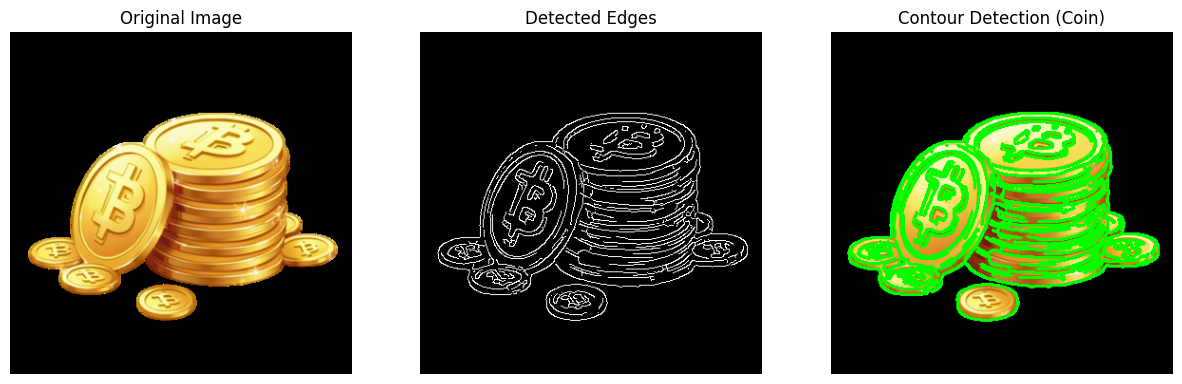

In [3]:

from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(" Upload a coin image (e.g., coin.jpg):")
uploaded = files.upload()
image_path = next(iter(uploaded))

# --- Step 1: Preprocessing ---
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

# --- Step 2: Edge and Contour Detection ---
def detect_coin_edges(preprocessed, original):
    # Morphological operations to smooth and close edges
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(preprocessed, cv2.MORPH_CLOSE, kernel)

    # Apply Canny edge detection (tuned for coins)
    edges = cv2.Canny(morph, 30, 100)

    # Find contours (coin outline)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on original image
    result = original.copy()
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)
    return result, edges

# --- Step 3: Display Results ---
def present_results(original_image, processed_image, edges):
    # Convert to RGB for matplotlib
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    processed_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

    # Plot images
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Detected Edges")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Contour Detection (Coin)")
    plt.imshow(processed_rgb)
    plt.axis('off')

    plt.show()

# --- Step 4: Main Execution ---
image = cv2.imread(image_path)

if image is None:
    print("❌ Error: Image not found. Check the uploaded file name.")
else:
    preprocessed = preprocess_image(image)
    coin_detected_image, edges = detect_coin_edges(preprocessed, image)
    present_results(image, coin_detected_image, edges)


#